In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(1000)
np.random.permutation(10000)

array([8034, 7122, 7571, ..., 6215, 4695, 9651])

In [3]:
df_terr=pd.read_csv(r"C:\Users\gokul\Downloads\xdm\datasample\codingninjads\Lec11\terrorismData.csv")
df_terr.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary


In [4]:
df_terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [5]:
df_terr.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


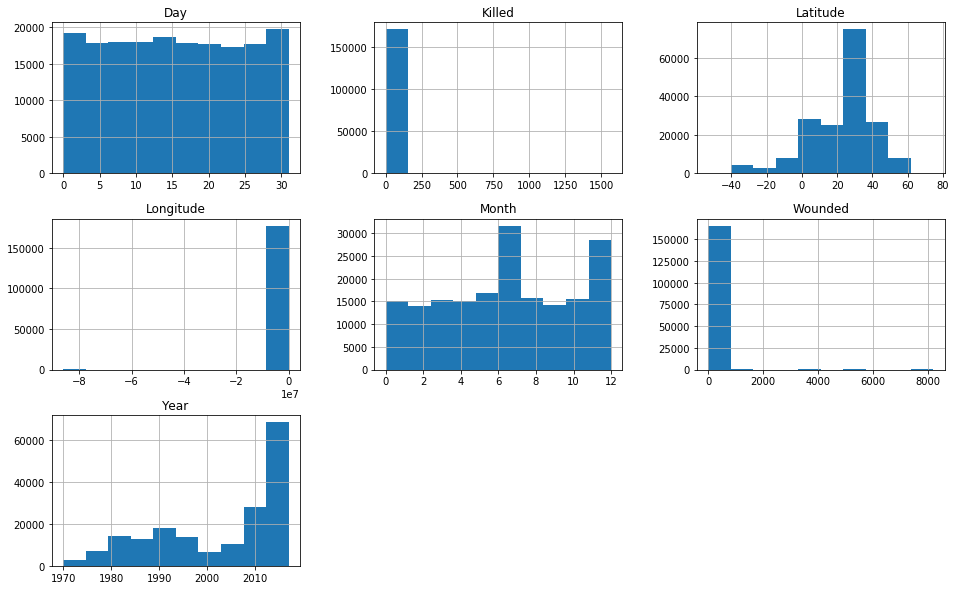

In [6]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(16,10))
df_terr.hist(figsize=(16,10))
plt.show()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=20)
split

StratifiedShuffleSplit(n_splits=1, random_state=20, test_size=0.2,
            train_size=None)

In [8]:
# df_terr.fillna(0,inplace=True)

In [9]:
df_terr['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [13]:
df_terr["year_cat"]=pd.cut(df_terr['Year'],bins=[1969,1980,1990,2000,2010,2020])

In [16]:
print(df_terr["year_cat"].unique())
df_terr.head()

[(1969, 1980], (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]]
Categories (5, interval[int64]): [(1969, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]


,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,year_cat
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,"(1969, 1980]"
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,"(1969, 1980]"
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,"(1969, 1980]"
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,"(1969, 1980]"
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,"(1969, 1980]"


In [18]:
df_no_na=df_terr[['Year','Month','Day','Killed','Wounded']].fillna(method='ffill')

In [19]:
df_no_na.describe()

,Year,Month,Day,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.488995,3.147696
std,13.259430,3.388303,8.814045,11.942602,34.582571
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [20]:
df_no_na["year_cat"]=pd.cut(df_no_na['Year'],bins=[1969,1980,1990,2000,2010,2020])

In [21]:
for train_i,test_i in split.split(df_no_na,df_no_na['year_cat']):
    strat_train_set=df_terr.loc[train_i]
    strat_test_set=df_terr.loc[test_i]


In [23]:
strat_train_set.shape

(145352, 18)

In [24]:
strat_test_set.shape

(36339, 18)

In [25]:
strat_train_set.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,year_cat
50108,1992,2,8,Lebanon,An Nabatiyah,Middle East & North Africa,Braachit,33.176111,35.443333,Armed Assault,3.0,0.0,Patrol,NaN,Abu Nidal Organization (ANO),Military,Firearms,"(1990, 2000]"
61441,1996,1,16,Guatemala,Guatemala,Central America & Caribbean,Guatemala City,14.622869,-90.529068,Bombing/Explosion,0.0,0.0,Unk,NaN,Guatemalan National Revolutionary Unity (URNG),Unknown,Explosives,"(1990, 2000]"
16176,1982,5,7,Guatemala,Quiche,Central America & Caribbean,Unknown,15.498381,-90.982067,Assassination,3.0,0.0,NaN,NaN,Unknown,Unknown,Firearms,"(1980, 1990]"
128576,2014,3,10,Philippines,Sorsogon,Southeast Asia,Bugtong,12.862616,124.142576,Armed Assault,0.0,1.0,Patrol,03/10/2014: Assailants attacked a military sec...,New People's Army (NPA),Military,Firearms,"(2010, 2020]"
108982,2012,6,28,Iraq,Saladin,Middle East & North Africa,Samarra,34.208416,43.890713,Armed Assault,2.0,0.0,Members,06/28/2012: Assailants attacked a Sahwa Counci...,Unknown,Terrorists/Non-State Militia,Firearms,"(2010, 2020]"


In [26]:
strat_train_set["year_cat"].value_counts()/len(strat_train_set)

(2010, 2020]    0.451256
(1980, 1990]    0.178243
(2000, 2010]    0.154391
(1990, 2000]    0.146892
(1969, 1980]    0.069218
Name: year_cat, dtype: float64

In [27]:
strat_test_set["year_cat"].value_counts()/len(strat_test_set)

(2010, 2020]    0.451251
(1980, 1990]    0.178238
(2000, 2010]    0.154407
(1990, 2000]    0.146895
(1969, 1980]    0.069209
Name: year_cat, dtype: float64

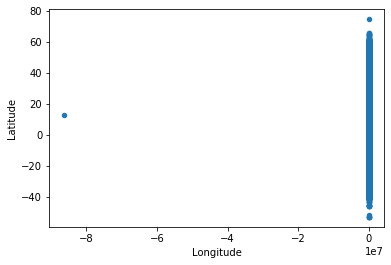

In [30]:
# df_terr.plot(kind='scatter',x='Longitude',y='Latitude')